This can be inserted after the computation of the posterior.

In [28]:
from sbi.analysis import check_sbc, run_sbc, get_nltp, sbc_rank_plot
from sbi.analysis import sbc_rank_plot

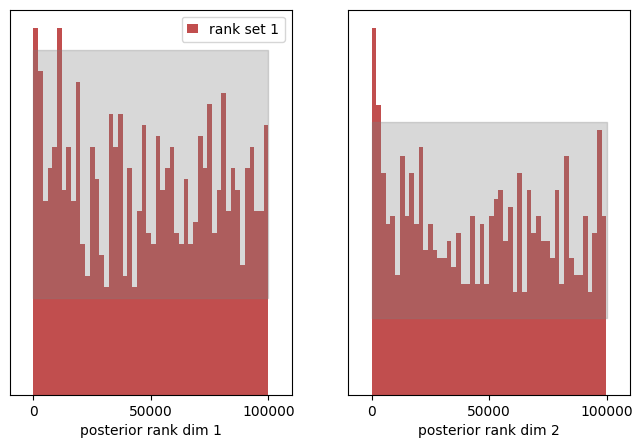

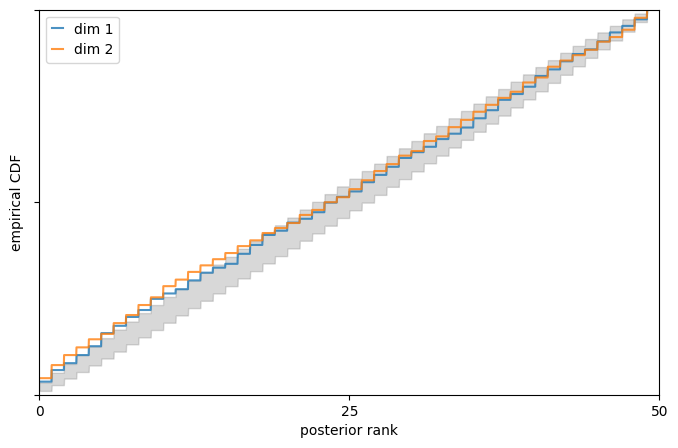

In [32]:
num_sbc_runs = 1000  # choose a number of sbc runs, should be ~100s or ideally 1000
# generate ground truth parameters and corresponding simulated observations for SBC.
thetas = prior.sample((num_sbc_runs,))
xs = Brownian_Motion_simulator(thetas)
# run SBC: for each inference we draw 1000 posterior samples.
num_posterior_samples = 10000
ranks, dap_samples = run_sbc(
    thetas.cuda(), xs.cuda(), posterior, num_posterior_samples=num_posterior_samples
)
check_stats = check_sbc(
    ranks, thetas, dap_samples, num_posterior_samples=num_posterior_samples
)
print(
    f"kolmogorov-smirnov p-values \ncheck_stats['ks_pvals'] = {check_stats['ks_pvals'].numpy()}"
)
print(
    f"c2st accuracies \ncheck_stats['c2st_ranks'] = {check_stats['c2st_ranks'].numpy()}"
)
print(f"- c2st accuracies check_stats['c2st_dap'] = {check_stats['c2st_dap'].numpy()}")

f, ax = sbc_rank_plot(
    ranks=ranks,
    num_posterior_samples=num_posterior_samples,
    plot_type="hist",
    num_bins=None,  # by passing None we use a heuristic for the number of bins.
)
f, ax = sbc_rank_plot(ranks, 1_000, plot_type="cdf")